# Layering Example: MLB Strikeouts Over Time

Reproducing pieces of [the NYT Strikeout Plot](http://www.nytimes.com/interactive/2013/03/29/sports/baseball/Strikeouts-Are-Still-Soaring.html) using [Altair](http://altair-viz.github.io).
This demonstrate's Altair's *Layering* interface.

The data is available in the git repository

In [1]:
import pandas as pd

data = "../data/strikeouts.csv"
pd.read_csv(data).head()

,Unnamed: 0,histname,longname,year,histcode,franchise,so,g
0,1,Boston Beaneaters,1901 Boston Beaneaters,1901,BSN,ATL,518,140
1,2,Milwaukee Brewers,1901 Milwaukee Brewers,1901,MLA,BAL,387,139
2,3,Boston Americans,1901 Boston Americans,1901,BOS,BOS,281,138
3,4,Chicago Orphans,1901 Chicago Orphans,1901,CHC,CHC,530,140
4,5,Chicago White Sox,1901 Chicago White Sox,1901,CHW,CHW,336,137


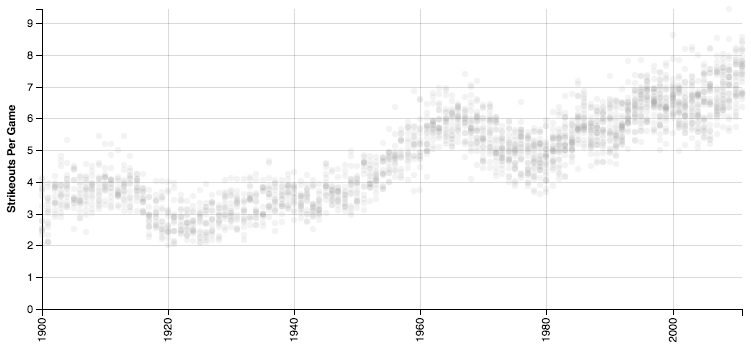

In [2]:
from altair import *

# Create an empty LayeredChart with our data
chart = LayeredChart(data).transform_data(
    calculate=[Formula(field='so_per_game', expr='datum.so / datum.g')]
).configure_cell(
    height=300,
    width=700
)

# Add-in team-by-team points
chart += Chart().mark_circle(
    color='gray',
    opacity=0.1,
).encode(
    x=X('year:T', timeUnit='year', axis=Axis(title=' ')),
    y=Y('so_per_game', axis=Axis(title='Strikeouts Per Game')),
    detail='histcode:N',
)

chart.display()

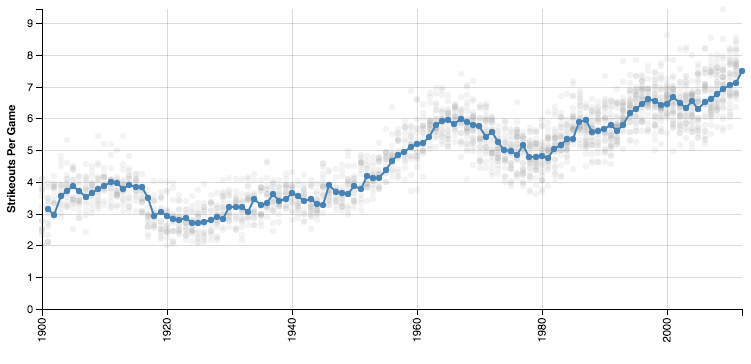

In [3]:
# Add a rolling-mean as a line
chart += Chart().mark_line().encode(
    x='year:T',
    y='mean(so_per_game)',
)

# Add rolling-mean as a circle
chart += Chart().mark_circle().encode(
    x='year:T',
    y='mean(so_per_game)',
)

chart.display()